# **Exemplo de projeto de Machine Learning** - Dataset Penguins
---

Este notebook apresente um exemplo de EDA sobre um dataset (**Pinguins**) e a aplicação e validação de um algoritmo de Machine Learning.

Link: https://www.kaggle.com/datasets/larsen0966/penguins



## Importação das bibliotecas utilizadas no notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.neural_network import MLPClassifier

In [2]:
pip install numpy pandas scipy scikit-learn matplotlib seaborn jupyterlab notebook ipywidgets statsmodels plotly xgboost lightgbm


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   - -------------------------------------- 1.8/38.6 MB 10.1 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/38.6 MB 11.0 MB/s eta 0:00:04
   ------- -------------------------------- 6.8/38.6 MB 11.0 MB/s eta 0:00:03
   --------- ------------------------------ 9.2/38.6 MB 11.2 MB/s eta 0:00:03
   ------------ --------------------------- 11.8/38.6 MB 11.4 MB/s eta 0:00:03
   -------------- ------------------------- 14.4/38.6 MB 11.5 MB/s eta 0:00:03
   ----------------- ---------------------- 17.0/38.6 MB 11.5 MB/s eta 0:00:02
   -------------------- ------------------- 19.4/38.6 MB 11.6 MB/s eta 0:00:02
   ---------------------- ----------------- 21.8/38.6 MB 11.6 MB/s eta 0:00:02
   ------------------------- -------------- 24.4/38.6 MB 11.6 MB/s eta 0:00:02
   -----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

# 1) Análise dos dados e escolha dos atributos

A primeira etapa no desenvolvimento de um projeto de Machine Learning é a análise dos dados que serão utilizados e a escolha dos atributos.

Para isso, primeiro, iremos carregar o dataset e identificar as colunas disponíveis.

In [4]:
df = pd.read_csv("penguins.csv")
df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'penguins.csv'

Aqui, vemos que o dataset possui 8 colunas e 344 linhas.

A coluna alvo será a **"species"**, que defini a espécie do pinguim.

As colunas **"Unnamed: 0"** serve apenas para indexar os dados, logo, podemos excluí-la pois não será útil para os algoritmos.



In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

Com isso, sobre as seguintes colunas:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


Também é importante verificar qual a distribuição das classes da coluna alvo no dataset.

In [6]:
df['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


Aqui, podemos ver que a classe **Chinstrap** está bem menos representada em comparação as demais, o que pode influenciar na estratégia que usaremos nos dados faltantes.

## Tratamento dos dados faltantes.

Para usar a maioria dos algoritmos de Machine Learning, precisamos tratar os dados faltantes de tal forma que todas as linhas do dataset possuam valores válidos.

Isso significa que podemos excluir as linhas que possuem dados faltantes ou preencher esses dados com alguma técnica estatística.

In [ ]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


Como sabemos que o nosso dataset é desbalanceado, precisamos verificar se as linhas com dados faltantes são referentes a classe menos representada.

Para isso, vamos verificar de quais classes são essas linhas com dados faltantes

In [ ]:
linhas_com_nulos = df[df.isnull().any(axis=1)]
linhas_com_nulos['species'].value_counts()

,count
species,
Adelie,6
Gentoo,5


Devido ao fato das linhas da classe menos representada não possuem dados faltantes e a quantidade de linhas ser muito baixa, podemos apenas excluir essas linhas.

OBS: Caso os dados faltantes estejam na classe menos representada, devemos escolher outra estratégia para tentar preenchelos e não perder as linhas referentes a classe.

In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


# Escolha dos atributos

Após a formatação das colunas em dados númericos, precisamos escolhe quais colunas são mais expressiva para discriminar os dados na classe alvo.

Essa parte é uma das mais importantes no processo de desenvolvimento do projeto de Machine Lerning.

Para isso, podemos comparar as colunas em pares e verificar quais pares apresentam agrupamentos de uma mesma classe.

OBS: Como temos algumas colunas categóricas, iremos realizar uma transformação temporária apenas para visualizar como essas colunas se misturam com as numéricas.

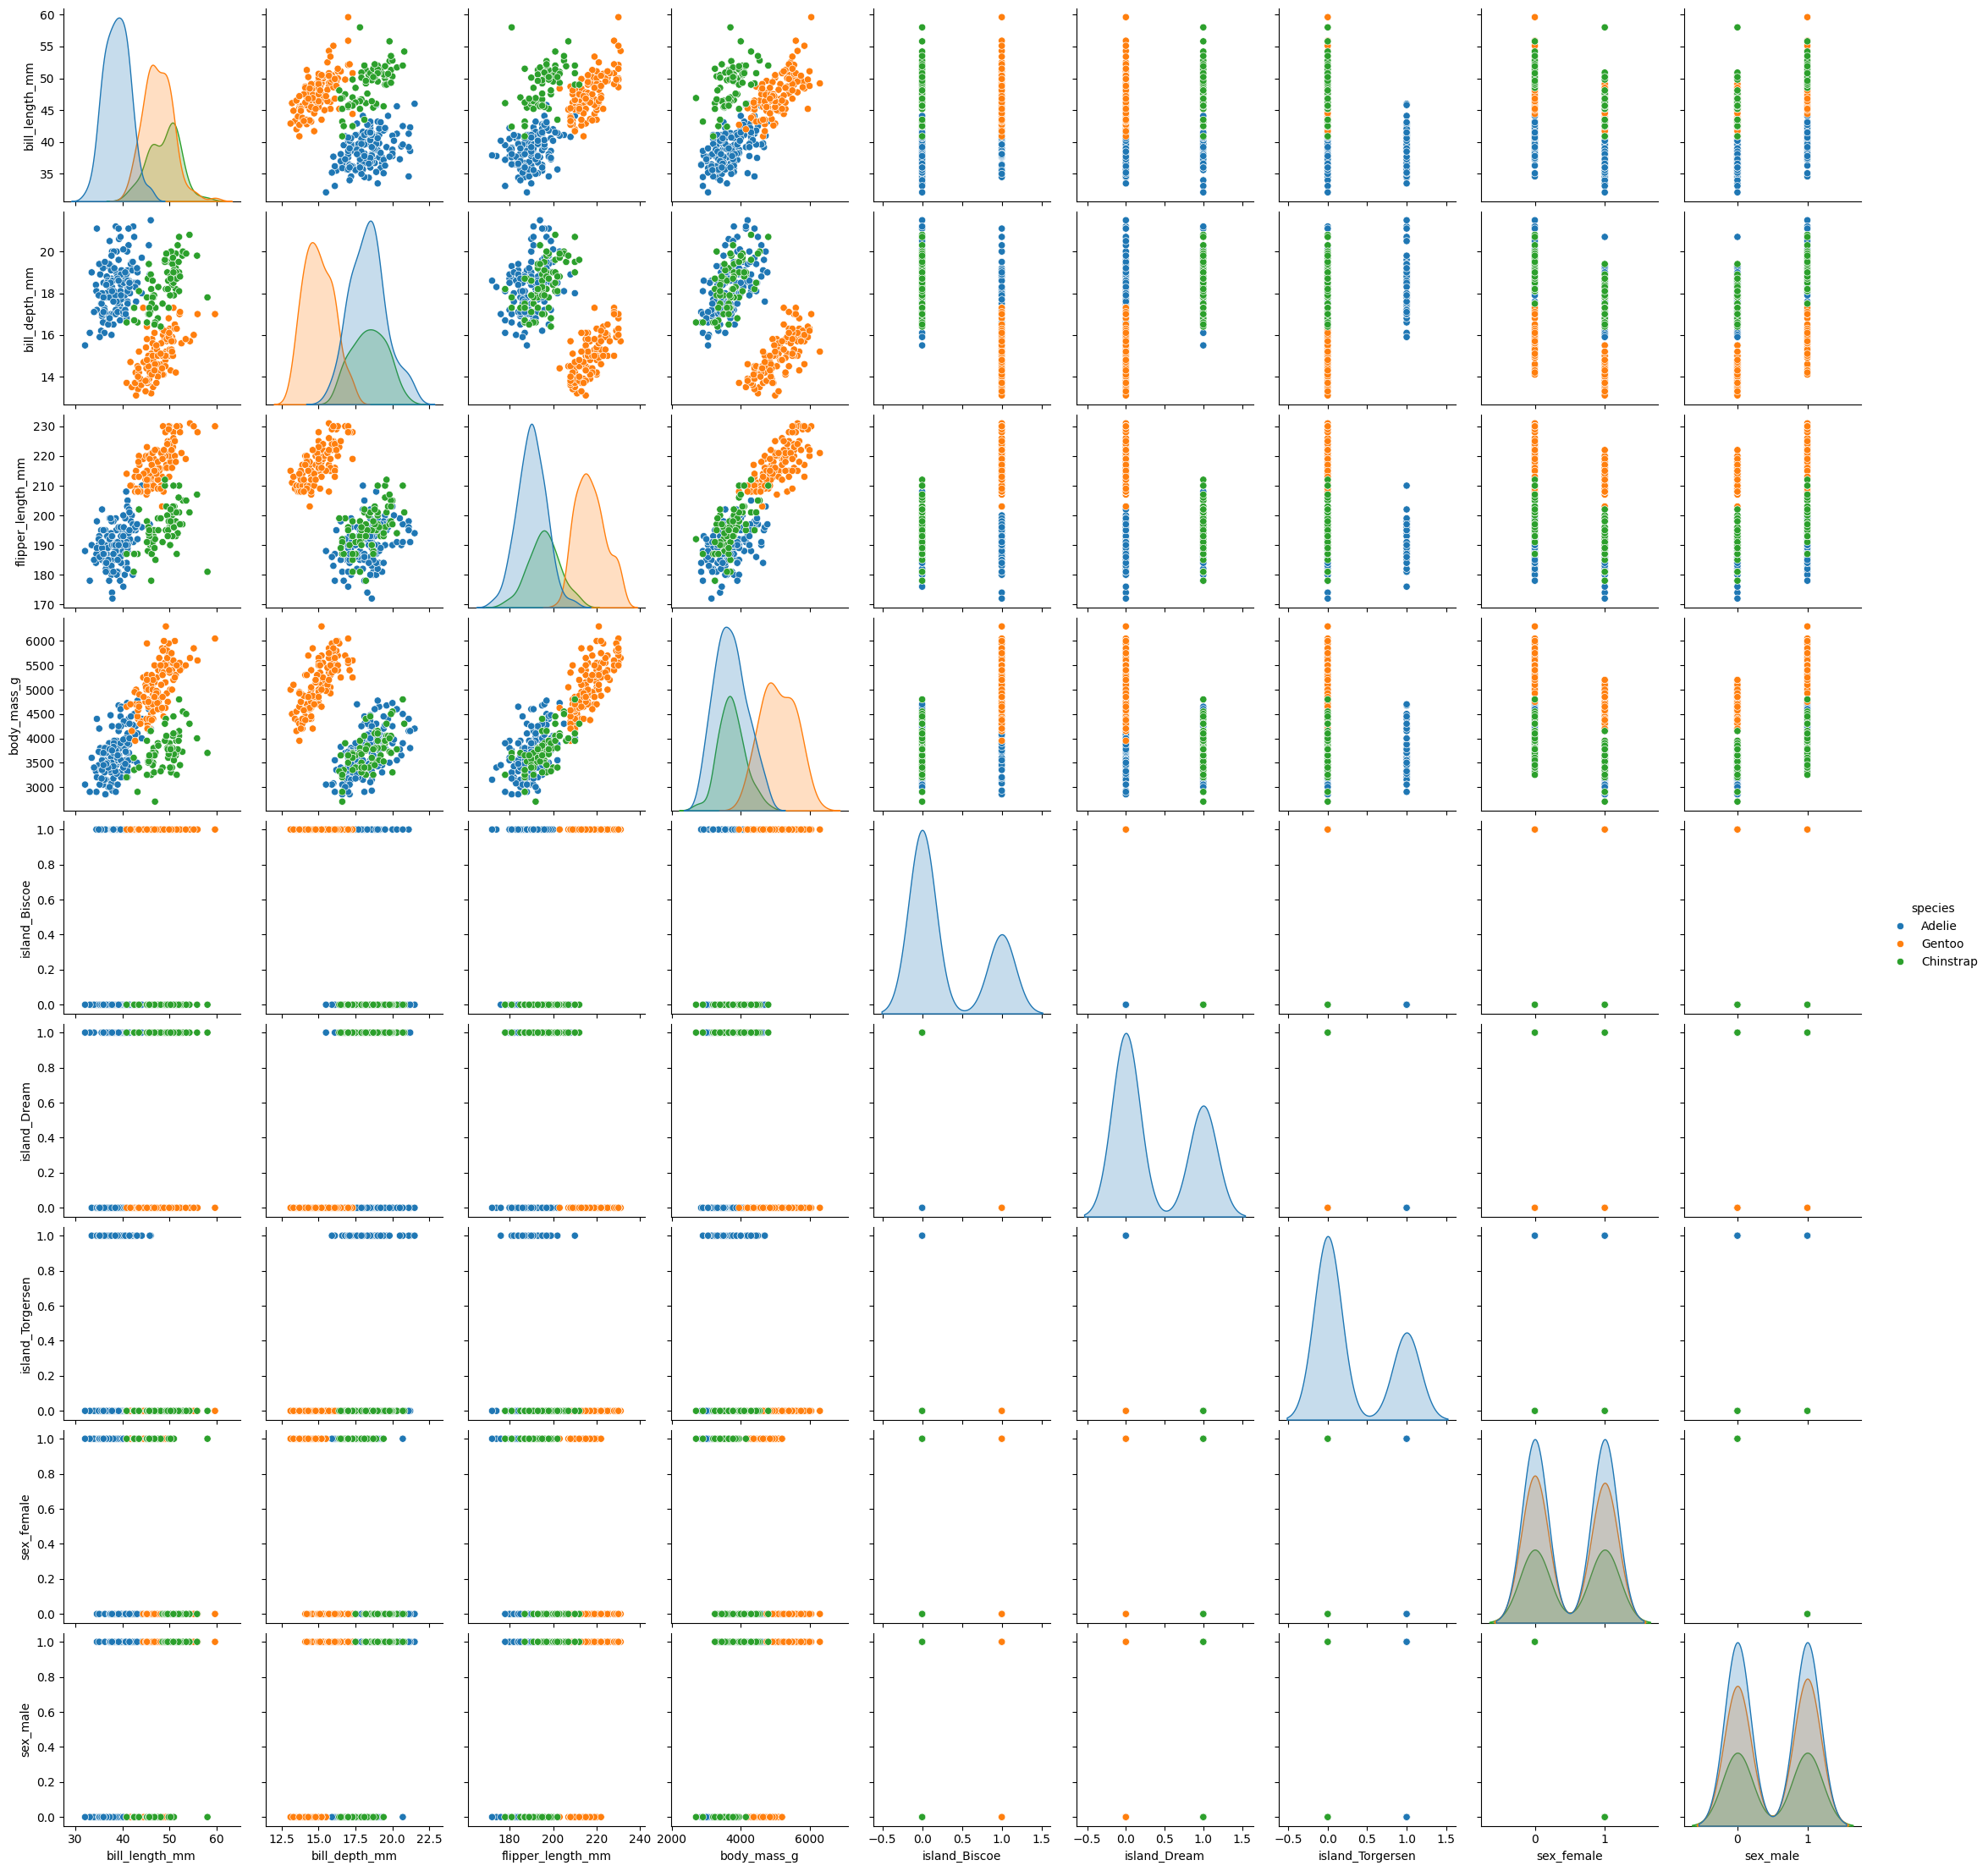

In [ ]:
df_encoded = pd.get_dummies(df, columns=['island', 'sex'], dtype=int)

target_col = 'species'

sns.pairplot(df_encoded, hue=target_col);
plt.show()

Com essa visualização, podemos ver que as classes azul (Adelie) e verde (Chinstrap) nos pares (flipper_length_mm, bill_depth_mm), (body_mass_g, bill_depth_mm) e (body_mass_g, flipper_length_mm) estão bem misturadas, o que pode dificultar os algoritmos na classificação

Porém, perceba que o par (body_mass_g, bill_length_mm) mostra que a classe laranja (Gentoo) está bem separa das demais, tornando-as colunas interessantes para classificar a classe alvo.

Também temos o par (body_mass_g, bill_depth_mm), que mistura um pouco as classes azul e laranja (Adelie e Gentoo), porém possui uma separação interessante da classe verde (Chinstrap). Já que possuimos um par que separa a classe laranja muito bem, podemos usar essa coluna para separar o restante (azul e verde).

Sendo assim, iremos escolhe apenas as colunas **body_mass_g**, **bill_depth_mm**, **bill_length_mm** para usar nos algoritmos.

In [ ]:
# Cria dataset com apenas as colunas 'body_mass_g', 'bill_depth_mm', 'bill_legth_mm' e 'species'
reduced_df = df[['body_mass_g', 'bill_depth_mm', 'bill_length_mm', 'species']]
reduced_df.head()

,body_mass_g,bill_depth_mm,bill_length_mm,species
0,3750.0,18.7,39.1,Adelie
1,3800.0,17.4,39.5,Adelie
2,3250.0,18.0,40.3,Adelie
3,3450.0,19.3,36.7,Adelie
4,3650.0,20.6,39.3,Adelie


# Reescala dos valores numéricos

Agora que escolhemos as colunas, podemos terminar o tratamento dos dados realizando a reescala dos valores numéricos.

In [ ]:
# Colunas para realizar a reescala
num_cols = ['body_mass_g', 'bill_depth_mm', 'bill_length_mm']

transformer = ColumnTransformer([
    ('MinMax',  MinMaxScaler(), num_cols)
])


scaled_values = transformer.fit_transform(reduced_df)

# Criar novo DataFrame com os dados transformados
formatted_df = pd.DataFrame(scaled_values, columns=num_cols)
formatted_df['species'] = df['species']

formatted_df.head()

,body_mass_g,bill_depth_mm,bill_length_mm,species
0,0.291667,0.666667,0.254545,Adelie
1,0.305556,0.511905,0.269091,Adelie
2,0.152778,0.583333,0.298182,Adelie
3,0.208333,0.738095,0.167273,Adelie
4,0.263889,0.892857,0.261818,Adelie


In [ ]:
from sklearn import preprocessing

final_df = pd.DataFrame(formatted_df)

# Transforma coluna alvo em númerica
final_df['species'] = formatted_df['species'].replace(['Adelie', 'Gentoo', 'Chinstrap'], [0, 1, 2])
print(final_df)

X = final_df[['body_mass_g', 'bill_depth_mm', 'bill_length_mm']]
Y = final_df['species']

print(X.head())
print(Y.head())

     body_mass_g  bill_depth_mm  bill_length_mm  species
0       0.291667       0.666667        0.254545        0
1       0.305556       0.511905        0.269091        0
2       0.152778       0.583333        0.298182        0
3       0.208333       0.738095        0.167273        0
4       0.263889       0.892857        0.261818        0
..           ...            ...             ...      ...
328     0.361111       0.797619        0.861818        2
329     0.194444       0.595238        0.414545        2
330     0.298611       0.607143        0.636364        2
331     0.388889       0.702381        0.680000        2
332     0.298611       0.666667        0.658182        2

[333 rows x 4 columns]
   body_mass_g  bill_depth_mm  bill_length_mm
0     0.291667       0.666667        0.254545
1     0.305556       0.511905        0.269091
2     0.152778       0.583333        0.298182
3     0.208333       0.738095        0.167273
4     0.263889       0.892857        0.261818
0    0
1    0
2 

## 2) Aplicação dos Algoritmos

Com os dados formatados e as colunas escolhidas, podemos aplicar o dataset nos algoritmos de Machine Learning.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.base import clone

# Rotina para executar um algoritmo e coletar os resultados usando Cross-validation (k=5)
def apply_algorithm(X, Y, algorithm, k=5, average='macro'):

  results = {
      'accuracy': [],
      'precision': [],
      'recall': [],
      'f1': []
  }

  k_folds = StratifiedKFold(n_splits = k)

  for train_index, test_index in k_folds.split(X, Y):
    alg = clone(algorithm)

    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]

    alg.fit(X_train, y_train)

    y_pred = alg.predict(X_test)

    results['accuracy'].append(accuracy_score(y_pred, y_test))
    results['precision'].append(precision_score(y_pred, y_test, average=average))
    results['recall'].append(recall_score(y_pred, y_test, average=average))
    results['f1'].append(f1_score(y_pred, y_test, average=average))

  return results

Vamos aplicar o algoritmo MLP nas colunas escolhidas e verificar o resultado.

Para validar os resultados, vamos usar a técnica de Cross-Validation com 5 partições.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import preprocessing

# Cria modelo de aprendizado
#alg_knn = KNeighborsClassifier(n_neighbors=3)

alg_nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(20, 20), random_state=1)

k = 5

# Aplica e captura métricas de avaliação
results = apply_algorithm(X, Y, alg_nn, k)

# Exibe resultados
print("Accuracy: ", np.array(results['accuracy'], dtype=float).mean())
print("Precision: ", np.array(results['precision'], dtype=float).mean())
print("Recall: ", np.array(results['recall'], dtype=float).mean())
print("F1-Score: ", np.array(results['f1'], dtype=float).mean())

Accuracy:  0.9880597014925373
Precision:  0.9854761904761904
Recall:  0.988015873015873
F1-Score:  0.9866390159328013


Obtivemos bons resultados usando apenas 3 das colunas do dataset.

Vamos agora executar o Knn usando todas as colunas para ver a diferença dos resultados.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import preprocessing

# Formata dataset para usar todas as colunas
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
cat_cols = ['sex', 'island']

# Escala valores
transformer = ColumnTransformer([
    ('MinMax',  MinMaxScaler(), num_cols),
    ('Label', OrdinalEncoder(dtype=int), cat_cols)
])

scaled_values = transformer.fit_transform(df)

full_dataset = pd.DataFrame(scaled_values, columns=num_cols + cat_cols)
full_dataset['species'] = df['species'].replace(['Adelie', 'Gentoo', 'Chinstrap'], [0, 1, 2])

full_X = full_dataset[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Cria modelo de aprendizado
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(20, 20), random_state=1)


# Aplica e captura métricas de avaliação
results = apply_algorithm(full_X, Y, nn)

# Exibe resultados
print("Accuracy: ", np.array(results['accuracy'], dtype=float).mean())
print("Precision: ", np.array(results['precision'], dtype=float).mean())
print("Recall: ", np.array(results['recall'], dtype=float).mean())
print("F1-Score: ", np.array(results['f1'], dtype=float).mean())

Accuracy:  0.9880597014925373
Precision:  0.9879392446633826
Recall:  0.9840503557744938
F1-Score:  0.9857931602948204


Como podemos ver, os resultados foram bem semelhantes, contudo, utilizar apenas 3 colunas apresentou resultados levemente superior. Além disso, diminuir a quantidade de colunas pode auxiliar na redução de Overfitting e pode melhorar a eficiência computacional no treinamento e execução do modelo.
